<a href="https://colab.research.google.com/github/filipecalegario/intro-programacao-python/blob/main/10_Dados_Visualizacao/Pandas_da_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

Pandas é uma biblioteca de Python que facilita a manipulação, preparação e limpeza dos dados.

<img  src="https://github.com/filipecalegario/intro-programacao-python/blob/main/10_Dados_Visualizacao/imgs/pandas.jpeg?raw=1" width="200" />

- Pandas é orientada a objetos.

- Criamos estruturas de dados pela construção de instâncias de diferentes classes.

- As duas classes mais importantes de Pandas são:

    - `Series`
    - `DataFrame`
    
- Pandas segue a convenção de Java de começar o nome das classes com uma letra maiúscula, enquanto as instâncias em letras minúsculas.
  
- Geralmente, importamos o módulo de Pandas e o assinalamos com a versão reduzida do nome: `pd`..

Para importar a biblioteca, usamos o comando:

In [1]:
import pandas as pd

A partir de agora, sempre que você utilizar `pd` dentro do código, estará referenciado a biblioteca pandas.

# Series

Trata-se de uma lista (também chamado de array) de ```dados``` unidimensional, que possui um array de rótulos chamado ```index```. Cada elemento do array de dados possui uma associação com um elemento do *index*.

In [22]:
data = [1, 2, 1, 14, 25] # Esta linha cria uma lista
my_series = pd.Series(data) # Esta linha cria uma instância do objeto Series de pandas, os índices são automaticamente gerados.
my_series2 = pd.Series(data, index = ['a', 'b', 'c', 'd', 'e'])  # Parecido com o dicionário de Python, índices são definidos
print(my_series)
print(my_series2)

0     1
1     2
2     1
3    14
4    25
dtype: int64
a     1
b     2
c     1
d    14
e    25
dtype: int64


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


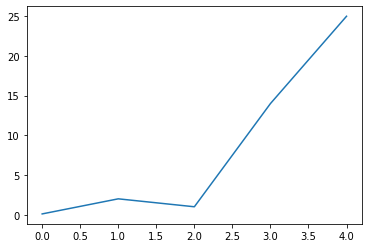

In [7]:
!pip install matplotlib
import matplotlib
my_series.plot()

Ou  você pode usar o comando do Jupyter `%` chamado de Magic

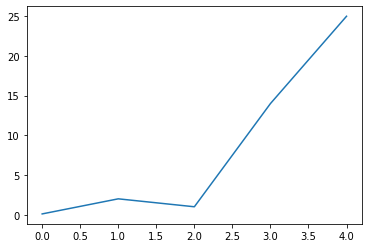

In [6]:
%matplotlib inline
my_series.plot()

## Criando uma Series de um dicionário

In [8]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
my_series = pd.Series(d)
my_series

a    0.0
b    1.0
c    2.0
dtype: float64

## Indexando e Fatiando uma Series com `[]` ou . 

- As séries podem ser acessadas usando a mesma sintaxe de listas e dicionários em Python.
- Usamos os rótulos no índice para acessar cada elemento.
- Também podemos usar o rótulo como um atributo `my_series.b`
- Podemos especificar um intervalo com `my_series[['b', 'c']]`

In [16]:
my_series2

a     1
b     2
c     1
d    14
e    25
dtype: int64

In [24]:
print(my_series2['b'])
print(my_series2.b)
print(my_series2[['b', 'c']])

2
2
b    2
c    1
dtype: int64


## Operações com Series

In [25]:
dados_entrada = {'a' : 0., 'b' : 1., 'c' : 2.}

a = pd.Series(dados_entrada)
print('Imprimindo o array "a":\n', a)
print('==========================')

b1 = 10 * a
print('Multiplicando diretamente por 10:\n', b1)
print('==========================')

b2 = a.multiply(10)
print('Multiplicando por 10 usando a função:\n', b2)
print('==========================')

c1 = a + b1
print('Somando "a" e "b" diretamente:\n', c1)
print('==========================')

c2 = pd.Series.add(a, b1) 
print('Somando "a" e "b" com uma função:\n', c2)
print('==========================')



Imprimindo o array "a":
 a    0.0
b    1.0
c    2.0
dtype: float64
Multiplicando diretamente por 10:
 a     0.0
b    10.0
c    20.0
dtype: float64
Multiplicando por 10 usando a função:
 a     0.0
b    10.0
c    20.0
dtype: float64
Somando "a" e "b" diretamente:
 a     0.0
b    11.0
c    22.0
dtype: float64
Somando "a" e "b" com uma função:
 a     0.0
b    11.0
c    22.0
dtype: float64


In [26]:
sum_a = pd.Series.sum(a) 
print('Somando todos os elementos de "a":\n', sum_a)
print("==========================")

f = a ** 2 
print('square a:\n', f)
print('Elevando todos os elementos de "a" a dois:\n', sum_a)
print("==========================")

x = pd.Series({'a' : 0., 'b' : 1., 'c' : 2.})
y = pd.Series({'a' : 3., 'b' : 4., 'c' : 5.})
z = x + y
print('Adicionando duas Series:\n', z)
print("==========================")

Somando todos os elementos de "a":
 3.0
square a:
 a    0.0
b    1.0
c    4.0
dtype: float64
Elevando todos os elementos de "a" a dois:
 3.0
Adicionando duas Series:
 a    3.0
b    5.0
c    7.0
dtype: float64


## Séries Temporais (Time Series)

- Times Series em pandas associam tempos específicos com valores em cada linha

In [37]:
data = [0.1, 15, 2.5, 25, 14]

In [49]:
dates = pd.date_range('19/4/2000', periods = 5, freq = 'Y')
print(dates)

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')


In [50]:
time_series = pd.Series(data, index = dates)
time_series

2000-12-31     0.1
2001-12-31    15.0
2002-12-31     2.5
2003-12-31    25.0
2004-12-31    14.0
Freq: A-DEC, dtype: float64

In [70]:
arquivo = open('/content/temp.csv')
linhas = arquivo.readlines()
linhas_sem_quebra = []
for linha in linhas:
    linhas_sem_quebra.append(linha.replace('\n',''))
# print(linhas_sem_quebra)
temperaturas = []
datas = []
for linha in linhas_sem_quebra:
    partes = linha.split(',')
    temperatura = partes[0]
    data = partes[5]
    if(temperatura != '\ufeffT'):
        temperaturas.append(float(temperatura))
        datas.append(data)
# temperaturas.remove('\ufeffT')
# datas.remove('date')
print(temperaturas)
print(datas)


[26.86, 27.1, 27.24, 26.34, 26.92, 26.54, 26.1, 27.3, 28.06, 27.9, 27.18, 27.42, 28.04, 27.48, 28.0, 27.82, 27.96, 27.86, 28.16, 27.18, 28.06, 28.38, 27.76, 28.22, 28.62, 28.78, 28.52, 27.98, 27.78, 27.52, 27.5, 27.76, 28.76, 28.16, 27.88, 28.02, 27.5, 26.86, 26.2, 24.98, 26.8, 26.76, 27.62, 27.68, 28.22, 28.0, 25.62, 28.16, 28.46, 28.46, 28.36, 27.48, 27.66, 28.36, 28.56, 28.88, 27.92, 28.44, 27.92, 28.46, 28.54, 28.86, 28.96, 28.44, 27.92, 27.98, 27.92, 27.62, 28.38, 28.78, 28.44, 27.88, 28.46, 28.7, 28.48, 28.5, 28.22, 29.06, 27.94, 27.92, 28.22, 27.98, 28.06, 28.1, 28.1, 27.16, 27.12, 27.66, 27.2, 27.54, 27.2, 25.64, 26.16, 27.74, 27.54, 28.4, 27.66, 27.7, 26.84, 27.28, 25.86, 27.12, 27.62, 27.88, 27.4, 27.12, 27.06, 26.4, 27.72, 27.38, 27.7, 27.24, 27.02, 27.2, 27.24, 27.6, 27.96, 26.52, 27.1, 27.38, 26.08, 26.88, 27.22, 26.42, 25.3, 25.74, 26.28, 26.12, 25.78, 26.36, 26.06, 24.18, 25.74, 25.8, 25.78, 25.12, 25.56, 25.96, 25.48, 25.9, 25.6, 26.22, 24.28, 25.72, 25.2, 26.1, 26.02, 

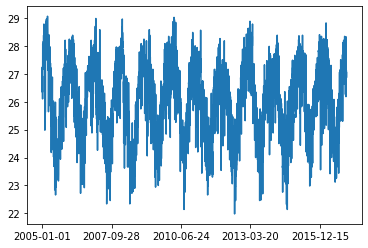

In [73]:
temp_recife = pd.Series(temperaturas, index = datas)
temp_recife.plot()

### Plotando uma Série Temporal

- Com os valores associados ao tempo, o comando `plot` pode ser usado para se obter uma visualização rápida na forma de um gráfico de linhas

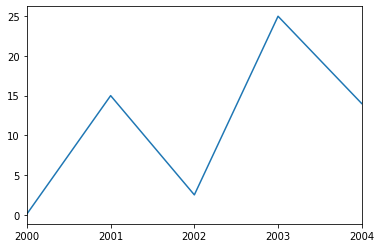

In [51]:
ax = time_series.plot()

In [44]:
type(time_series)

pandas.core.series.Series

## Filtrando dados

In [75]:
# cria a série
num = pd.Series([1, 2, 3, 4, 5, 6], index=['n1', 'n2', 'n3', 'n4', 'n5', 'n6'])

# filtra números pares
par = num[num % 2 == 0]

# filtra números impares
impar = num[num % 2 != 0]

print('todos')
print(num)
print('pares:')
print(par)
print('impares:')
print(impar)

todos
n1    1
n2    2
n3    3
n4    4
n5    5
n6    6
dtype: int64
pares:
n2    2
n4    4
n6    6
dtype: int64
impares:
n1    1
n3    3
n5    5
dtype: int64


# DataFrames

- O `pandas` fornece uma poderosa estrutura de dados chamada DataFrames (uma tradução possível seria Quadro de Dados, mas ninguém usa assim).

- É semelhante, mas não idêntico a:
     - uma tabela em um banco de dados relacional,
     - uma planilha Excel,
     - um dataframe em R.

- Um DataFrame tem várias colunas, cada uma das quais pode conter um tipo *diferente* de valor.

- Como uma série, possui um índice que fornece um rótulo para cada linha.


## Criando um DataFrame a partir de dados externos
- Os DataFrames podem ser lidos e gravados de/para:
     - consultas de banco de dados, tabelas de banco de dados
     - arquivos CSV
     - arquivos JSON
     - etc
    
- Esteja ciente de que os DataFrames ficam armazenados na memória:
     - Se você ler uma grande quantidade de dados, seu computador pode travar
     - Com big data, normalmente você leria um subconjunto ou resumo dos dados (ver mais sobre select statement)

## Criando um DataFrame a partir de estruturas de dados Python

- Os quadros de dados podem ser construídos a partir de outras estruturas de dados:
  - dicionário de listas
  - dicionário de dicionários
  - dicionário de Series
  - uma única Series
  - outro DataFrame

## Exemplo: Criando um DataFrame de várias Series
- Pandas codifica valores ausentes como `NaN` em vez de `None`
- A série deve ter chaves correspondentes para cada linha correspondente.

In [76]:
d = {
        'x' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'y' : pd.Series([4.,  6., 7.], index=['a',  'c', 'd']),
        'z' : pd.Series([0.2, 0.3, 0.4], index=[ 'b', 'c', 'd'])
}
print(type(d))

df = pd.DataFrame(d)
print(df)

<class 'dict'>
     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [83]:
# print(type(df[['x', 'y']]))
df[['x', 'y']]

,x,y
a,1.0,4.0
b,2.0,NaN
c,3.0,6.0
d,NaN,7.0


## Plotando DataFrames

- Ao plotar um DataFrame, cada coluna é plotada como sua própria série no mesmo gráfico.

- Os nomes das colunas são usados para rotular cada série.

- Os nomes das linhas (índice) são usados para rotular o eixo x.

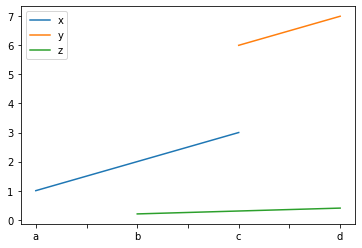

In [77]:
ax = df.plot()

## Funções e DataFrames

- Podemos fazer cálculos e funções com DataFrames como Series.
- As funções normalmente retornarão um DataFrames ou uma Serie, dependendo.
- Para fazer uma cópia, não defina dois DataFrames usando o comando de atribuição, usem o método copy: `df2= df.copy()`

In [84]:
df2 = df.copy()
print(df, '\n', df2)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4 
      x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [86]:
df2['x1'] = df2['x'] * 2
df2

,x,y,z,x1
a,1.0,4.0,NaN,2.0
b,2.0,NaN,0.2,4.0
c,3.0,6.0,0.3,6.0
d,NaN,7.0,0.4,NaN


In [88]:
def ajuste_x(valor):
    resultado = ''
    if valor < 2:
        resultado = 'pequeno'
    else:
        resultado = 'GRANDE'
    return resultado

df['label_x'] = df['x'].apply(ajuste_x)
df['label_y'] = df['y'].apply(ajuste_x)
df['label_z'] = df['z'].apply(ajuste_x)
df

,x,y,z,label,label_x,label_y,label_z
a,1.0,4.0,NaN,pequeno,pequeno,GRANDE,GRANDE
b,2.0,NaN,0.2,GRANDE,GRANDE,GRANDE,pequeno
c,3.0,6.0,0.3,GRANDE,GRANDE,GRANDE,pequeno
d,NaN,7.0,0.4,GRANDE,GRANDE,GRANDE,pequeno


## Estatísticas resumidas
- Para obter estatísticas resumidas rapidamente sobre valores numéricos, use o método `describe`.
- Você receberá um aviso se houver valores ausentes.
- O resultado é em si um DataFrame, que podemos fatiar `dfstats.y['mean']`.

In [89]:
dfstats = df.describe()
print(dfstats)
# Vejam a diferença de usar o interactive output
dfstats

         x         y     z
count  3.0  3.000000  3.00
mean   2.0  5.666667  0.30
std    1.0  1.527525  0.10
min    1.0  4.000000  0.20
25%    1.5  5.000000  0.25
50%    2.0  6.000000  0.30
75%    2.5  6.500000  0.35
max    3.0  7.000000  0.40


,x,y,z
count,3.0,3.000000,3.00
mean,2.0,5.666667,0.30
std,1.0,1.527525,0.10
min,1.0,4.000000,0.20
25%,1.5,5.000000,0.25
50%,2.0,6.000000,0.30
75%,2.5,6.500000,0.35
max,3.0,7.000000,0.40


In [100]:
df_notnull = df.dropna()
df_notnull

df[df['x'].notnull()]

,x,y,z,label,label_x,label_y,label_z
a,1.0,4.0,NaN,pequeno,pequeno,GRANDE,GRANDE
b,2.0,NaN,0.2,GRANDE,GRANDE,GRANDE,pequeno
c,3.0,6.0,0.3,GRANDE,GRANDE,GRANDE,pequeno


## Acessando os rótulos de linha e coluna

- Os rótulos das linhas (índice) podem ser acessados através do `df.index`.
- Os rótulos das colunas podem ser acessados através de `df.columns`.

In [101]:
print(df.index)
print(df.columns)

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['x', 'y', 'z', 'label', 'label_x', 'label_y', 'label_z'], dtype='object')


## Carregando arquivos com Pandas
- Sempre que você tiver um conjunto de dados com uma variedade de campos de vários tipos, carregá-lo no Pandas é uma boa estratégia.
- Você pode carregar de um arquivo local ou de um URL.

In [104]:
frame_iris = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/iris.csv')
frame_iris

(150, 5)

In [110]:
temp_recife_df = pd.read_csv('/content/temp.csv', parse_dates = ['date'])
temp_recife_df.dtypes

T               float64
H               float64
year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

In [119]:
temp_recife_df_limpo = temp_recife_df.drop(columns = ['year', 'month', 'day', 'H'])
temp_recife_df_limpo

,T,date
0,26.86,2005-01-01
1,27.10,2005-01-02
2,27.24,2005-01-03
3,26.34,2005-01-04
4,26.92,2005-01-05
...,...,...
4379,26.80,2016-12-28
4380,27.12,2016-12-29
4381,27.04,2016-12-30
4382,26.86,2016-12-31


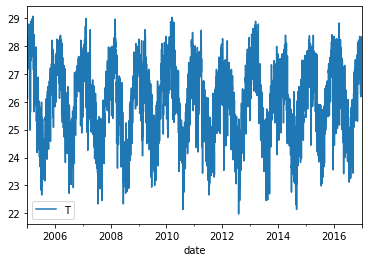

In [120]:
temp_recife_df_limpo.plot(x='date')

## Exemplo: Carregando dados da bolsa

Vamos iniciar com um arquivo CSV. 

A biblioteca Pandas carrega os dados em uma estrutura de dados própria, indexando cada linha, separando variáveis com delimitadores customizáveis, inferindo qual o tipo de dado de cada coluna, convertendo os dados (se necessário, por exemplo, texto para número), fazendo o tratamento de datas, valores ausentes e valores incorretos.

Para isso, utilizaremos uma base com o histórico de cotação das ações preferenciais da Petrobras no período de 07/03/2020 até 07/04/2020, que está no arquivo PETR4 Dados ``PETR4 Dados Históricos.csv``. Para tanto, utilizaremos os seguintes comandos:

In [127]:
nome_acao = '/content/PETR4 Dados Históricos.csv'
petr4 = pd.read_csv(nome_acao, decimal = ',')
type(petr4)

pandas.core.frame.DataFrame

In [128]:
petr4

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M","3,33%"
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M","-2,90%"
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M","-1,65%"
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M","0,74%"
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M","-4,06%"
5,04.11.2022,28.30,30.80,30.90,28.18,"193,76M","-5,51%"
6,03.11.2022,29.95,29.80,30.39,29.44,"137,79M","0,30%"
7,01.11.2022,29.86,30.57,30.67,29.56,"114,89M","0,17%"
8,31.10.2022,29.81,30.61,31.60,29.16,"261,68M","-8,47%"
9,28.10.2022,32.57,32.70,33.12,31.86,"128,50M","-1,18%"


In [129]:
petr4.dtypes

Data         object
Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.         object
Var%         object
dtype: object

O resultado é um objeto, chamado ``petr4``, que armazena um ``DataFrame`` Pandas. Note o uso de ``decimal=","`` para indicar que o arquivo está utilizando o separador decimal brasileiro.  Para ter uma ideia de sua estrutura, vamos imprimir as primeiras linhas do DataFrame, usando o seguinte comando para isso:

Um ``DataFrame`` se assemelha a uma estrutura de matriz. 

Cada linha da matriz possui um índice, que aparece na coluna mais à esquerda. Cada coluna, possui um índice, que é o próprio nome da coluna. 

Se quiséssemos imprimir as últimas linhas do Data Frame ``petr4``, poderíamos usar a função ``tail``.

A função ``head``/``tail`` imprime a 5 primeiras/últimas linhas. É possível controlar o número de linhas impressas, passando um parâmetro. Por exemplo, vamos imprimir apenas as duas primeiras linhas.

In [132]:
petr4.head(2)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M","3,33%"
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M","-2,90%"


In [133]:
petr4.tail(2)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
21,11.10.2022,33.00,32.89,33.33,32.61,"58,03M","-0,75%"
22,10.10.2022,33.25,33.65,33.89,33.00,"51,81M","-1,13%"


Se desejarmos visualizar apenas os nomes das colunas, podemos usar:

In [134]:
petr4.columns

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')

## Indexando e Fatiando colunas de DataFrames
- Maneira simples de selecionar coluna(s) `frame[[nome(s) da coluna]]`.
- Podem ter uma coluna (`df['x']`) ou múltiplas (`df[['x', 'y']]`).
- Ao especificar uma coluna, pode-se usar a notação de ponto simplificada `df.x`.
- Quando incluímos várias colunas, a fatia resultante é um DataFrame.
- Quando recuperamos uma única coluna, o resultado é uma Serie.
- Quando recuperamos várias colunas, o resultado é um Dataframe.

In [139]:
datas = petr4['Data']
datas.head()

0    11.11.2022
1    10.11.2022
2    09.11.2022
3    08.11.2022
4    07.11.2022
Name: Data, dtype: object

Note que, ao extrairmos os dados referenciados pela coluna `Data`, obtivemos um conjunto de valores em uma estrutura unidimensional. Cada um desses valores possuem um índice associado. Isso é uma...?

In [ ]:
type(datas)

In [142]:
print(petr4[['Data', 'Máxima']])

          Data  Máxima
0   11.11.2022   27.34
1   10.11.2022   26.89
2   09.11.2022   27.95
3   08.11.2022   27.53
4   07.11.2022   28.30
5   04.11.2022   30.90
6   03.11.2022   30.39
7   01.11.2022   30.67
8   31.10.2022   31.60
9   28.10.2022   33.12
10  27.10.2022   33.54
11  26.10.2022   33.53
12  25.10.2022   34.50
13  24.10.2022   36.82
14  21.10.2022   38.39
15  20.10.2022   36.55
16  19.10.2022   35.56
17  18.10.2022   34.23
18  17.10.2022   34.15
19  14.10.2022   34.14
20  13.10.2022   34.49
21  11.10.2022   33.33
22  10.10.2022   33.89


## Jogando fora (Dropping) colunas de um DataFrame

Tirando, por exemplo, a coluna de variação do DataFrame `petr4`

In [143]:
petr4.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M","3,33%"
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M","-2,90%"
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M","-1,65%"
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M","0,74%"
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M","-4,06%"


In [144]:
petr4_copy = petr4.copy()
petr4_copy.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M","3,33%"
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M","-2,90%"
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M","-1,65%"
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M","0,74%"
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M","-4,06%"


In [147]:
petr4_copy.drop(columns = ['Var%', 'Vol.'])
petr4_copy.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M","3,33%"
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M","-2,90%"
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M","-1,65%"
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M","0,74%"
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M","-4,06%"


Não apagou, não é? Veja por que:

In [148]:
petr4_copy_drop = petr4_copy.drop(columns = ['Var%', 'Vol.'])
petr4_copy_drop.head()

,Data,Último,Abertura,Máxima,Mínima
0,11.11.2022,26.99,25.86,27.34,25.70
1,10.11.2022,26.12,26.08,26.89,25.61
2,09.11.2022,26.90,27.15,27.95,26.64
3,08.11.2022,27.35,27.06,27.53,26.75
4,07.11.2022,27.15,27.96,28.30,27.07


In [149]:
petr4_copy.drop(columns = ['Var%', 'Vol.'], inplace = True)
petr4_copy

,Data,Último,Abertura,Máxima,Mínima
0,11.11.2022,26.99,25.86,27.34,25.70
1,10.11.2022,26.12,26.08,26.89,25.61
2,09.11.2022,26.90,27.15,27.95,26.64
3,08.11.2022,27.35,27.06,27.53,26.75
4,07.11.2022,27.15,27.96,28.30,27.07
5,04.11.2022,28.30,30.80,30.90,28.18
6,03.11.2022,29.95,29.80,30.39,29.44
7,01.11.2022,29.86,30.57,30.67,29.56
8,31.10.2022,29.81,30.61,31.60,29.16
9,28.10.2022,32.57,32.70,33.12,31.86


## Renomeando colunas

In [150]:
petr4.rename(columns = {'Vol.': 'Volume', 'Var%': 'Variação'}, inplace = True)
petr4

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M","3,33%"
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M","-2,90%"
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M","-1,65%"
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M","0,74%"
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M","-4,06%"
5,04.11.2022,28.30,30.80,30.90,28.18,"193,76M","-5,51%"
6,03.11.2022,29.95,29.80,30.39,29.44,"137,79M","0,30%"
7,01.11.2022,29.86,30.57,30.67,29.56,"114,89M","0,17%"
8,31.10.2022,29.81,30.61,31.60,29.16,"261,68M","-8,47%"
9,28.10.2022,32.57,32.70,33.12,31.86,"128,50M","-1,18%"


## Fazendo uma cópia do DataFrame

In [156]:
df = petr4.copy()
df.head(2)

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M","3,33%"
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M","-2,90%"


## Selecionando linhas

In [152]:
print (df[0:3])     # Seleciona linhas 0 a 2
print (df.iloc[0:3,:])     # Seleciona linhas 0 a 2
print (df.iloc[0:3,])      # Seleciona linhas 0 a 2
print (df.iloc[0:3])       # Seleciona linhas 0 a 2
print (df.iloc[[1,2,4]])   # Seleciona linhas 1, 2, and 4

         Data  Último  Abertura  Máxima  Mínima   Volume Variação
0  11.11.2022   26.99     25.86   27.34   25.70  146,36M    3,33%
1  10.11.2022   26.12     26.08   26.89   25.61  145,47M   -2,90%
2  09.11.2022   26.90     27.15   27.95   26.64  103,30M   -1,65%
         Data  Último  Abertura  Máxima  Mínima   Volume Variação
0  11.11.2022   26.99     25.86   27.34   25.70  146,36M    3,33%
1  10.11.2022   26.12     26.08   26.89   25.61  145,47M   -2,90%
2  09.11.2022   26.90     27.15   27.95   26.64  103,30M   -1,65%
         Data  Último  Abertura  Máxima  Mínima   Volume Variação
0  11.11.2022   26.99     25.86   27.34   25.70  146,36M    3,33%
1  10.11.2022   26.12     26.08   26.89   25.61  145,47M   -2,90%
2  09.11.2022   26.90     27.15   27.95   26.64  103,30M   -1,65%
         Data  Último  Abertura  Máxima  Mínima   Volume Variação
0  11.11.2022   26.99     25.86   27.34   25.70  146,36M    3,33%
1  10.11.2022   26.12     26.08   26.89   25.61  145,47M   -2,90%
2  09.11.2

Mais sobre a documentação do método `iloc`: 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html

## Limpando e convertendo dados

In [158]:
df['Variação'] = df['Variação'].str.replace(',','.')
print(df)
df['Variação'] = df['Variação'].str.replace('%','')
print(df)
df['Variação'] = pd.to_numeric(df['Variação'], errors='coerce')
print(df)

          Data  Último  Abertura  Máxima  Mínima   Volume Variação
0   11.11.2022   26.99     25.86   27.34   25.70  146,36M     3.33
1   10.11.2022   26.12     26.08   26.89   25.61  145,47M    -2.90
2   09.11.2022   26.90     27.15   27.95   26.64  103,30M    -1.65
3   08.11.2022   27.35     27.06   27.53   26.75   94,75M     0.74
4   07.11.2022   27.15     27.96   28.30   27.07  117,21M    -4.06
5   04.11.2022   28.30     30.80   30.90   28.18  193,76M    -5.51
6   03.11.2022   29.95     29.80   30.39   29.44  137,79M     0.30
7   01.11.2022   29.86     30.57   30.67   29.56  114,89M     0.17
8   31.10.2022   29.81     30.61   31.60   29.16  261,68M    -8.47
9   28.10.2022   32.57     32.70   33.12   31.86  128,50M    -1.18
10  27.10.2022   32.96     32.81   33.54   32.67  110,14M     0.76
11  26.10.2022   32.71     32.60   33.53   31.90  120,94M    -2.45
12  25.10.2022   33.53     34.04   34.50   33.21  111,56M    -2.10
13  24.10.2022   34.25     36.50   36.82   34.23  141,30M    -

In [159]:
df.dtypes

Data         object
Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Volume       object
Variação    float64
dtype: object

## Filtrando dados (Indexação Lógica)

- Os filtros são a seleção de linhas com base em critérios.
- Podemos selecionar com base em critérios específicos.


In [160]:
# Como elemento fundamental de um filtro, temos uma lista de booleanos baseada em algum tipo de condição
print(df)
df['Último'] >= 30

          Data  Último  Abertura  Máxima  Mínima   Volume  Variação
0   11.11.2022   26.99     25.86   27.34   25.70  146,36M      3.33
1   10.11.2022   26.12     26.08   26.89   25.61  145,47M     -2.90
2   09.11.2022   26.90     27.15   27.95   26.64  103,30M     -1.65
3   08.11.2022   27.35     27.06   27.53   26.75   94,75M      0.74
4   07.11.2022   27.15     27.96   28.30   27.07  117,21M     -4.06
5   04.11.2022   28.30     30.80   30.90   28.18  193,76M     -5.51
6   03.11.2022   29.95     29.80   30.39   29.44  137,79M      0.30
7   01.11.2022   29.86     30.57   30.67   29.56  114,89M      0.17
8   31.10.2022   29.81     30.61   31.60   29.16  261,68M     -8.47
9   28.10.2022   32.57     32.70   33.12   31.86  128,50M     -1.18
10  27.10.2022   32.96     32.81   33.54   32.67  110,14M      0.76
11  26.10.2022   32.71     32.60   33.53   31.90  120,94M     -2.45
12  25.10.2022   33.53     34.04   34.50   33.21  111,56M     -2.10
13  24.10.2022   34.25     36.50   36.82   34.23

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
Name: Último, dtype: bool

In [161]:
df[df['Último'] >= 30]

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação
9,28.10.2022,32.57,32.70,33.12,31.86,"128,50M",-1.18
10,27.10.2022,32.96,32.81,33.54,32.67,"110,14M",0.76
11,26.10.2022,32.71,32.60,33.53,31.90,"120,94M",-2.45
12,25.10.2022,33.53,34.04,34.50,33.21,"111,56M",-2.10
13,24.10.2022,34.25,36.50,36.82,34.23,"141,30M",-9.20
14,21.10.2022,37.72,36.45,38.39,36.39,"138,72M",3.43
15,20.10.2022,36.47,36.10,36.55,35.77,"113,78M",2.96
16,19.10.2022,35.42,34.13,35.56,34.02,"113,20M",3.54
17,18.10.2022,34.21,33.90,34.23,33.16,"81,21M",2.46
18,17.10.2022,33.39,33.24,34.15,32.84,"100,62M",-0.09


In [162]:
df

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M",3.33
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M",-2.90
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M",-1.65
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M",0.74
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M",-4.06
5,04.11.2022,28.30,30.80,30.90,28.18,"193,76M",-5.51
6,03.11.2022,29.95,29.80,30.39,29.44,"137,79M",0.30
7,01.11.2022,29.86,30.57,30.67,29.56,"114,89M",0.17
8,31.10.2022,29.81,30.61,31.60,29.16,"261,68M",-8.47
9,28.10.2022,32.57,32.70,33.12,31.86,"128,50M",-1.18


Poderíamos ter organizado em uma variável:

In [163]:
maiores_trinta = df['Último'] >= 30
df[maiores_trinta]

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação
9,28.10.2022,32.57,32.70,33.12,31.86,"128,50M",-1.18
10,27.10.2022,32.96,32.81,33.54,32.67,"110,14M",0.76
11,26.10.2022,32.71,32.60,33.53,31.90,"120,94M",-2.45
12,25.10.2022,33.53,34.04,34.50,33.21,"111,56M",-2.10
13,24.10.2022,34.25,36.50,36.82,34.23,"141,30M",-9.20
14,21.10.2022,37.72,36.45,38.39,36.39,"138,72M",3.43
15,20.10.2022,36.47,36.10,36.55,35.77,"113,78M",2.96
16,19.10.2022,35.42,34.13,35.56,34.02,"113,20M",3.54
17,18.10.2022,34.21,33.90,34.23,33.16,"81,21M",2.46
18,17.10.2022,33.39,33.24,34.15,32.84,"100,62M",-0.09


In [164]:
df.loc[maiores_trinta, ['Data', 'Último']]

,Data,Último
9,28.10.2022,32.57
10,27.10.2022,32.96
11,26.10.2022,32.71
12,25.10.2022,33.53
13,24.10.2022,34.25
14,21.10.2022,37.72
15,20.10.2022,36.47
16,19.10.2022,35.42
17,18.10.2022,34.21
18,17.10.2022,33.39


Mais informações sobre o método `loc`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [165]:
df['Maior que 30'] = 0  # Definimos o valor default
df.loc[df['Último'] >= 30, 'Maior que 30'] = 1 # Aqui então, mudamos todas as linhas para 1 caso >= 30
print(df['Maior que 30'])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
Name: Maior que 30, dtype: int64


In [166]:
df['Maior que 30'] = 'Ruim'  # Definimos o valor default
df.loc[df['Último'] >= 30, 'Maior que 30'] = 'Bom' # Aqui então, mudamos todas as linhas para 'Bom' caso >= 30
print(df['Maior que 30'])

0     Ruim
1     Ruim
2     Ruim
3     Ruim
4     Ruim
5     Ruim
6     Ruim
7     Ruim
8     Ruim
9      Bom
10     Bom
11     Bom
12     Bom
13     Bom
14     Bom
15     Bom
16     Bom
17     Bom
18     Bom
19     Bom
20     Bom
21     Bom
22     Bom
Name: Maior que 30, dtype: object


### Filtrando datas

O que tem de errado com o código abaixo?

In [167]:
df.dtypes

Data             object
Último          float64
Abertura        float64
Máxima          float64
Mínima          float64
Volume           object
Variação        float64
Maior que 30     object
dtype: object

In [171]:
df[df['Data'] >= '01.11.2022'] 

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação,Maior que 30
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M",3.33,Ruim
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M",-2.90,Ruim
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M",-1.65,Ruim
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M",0.74,Ruim
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M",-4.06,Ruim
5,04.11.2022,28.30,30.80,30.90,28.18,"193,76M",-5.51,Ruim
6,03.11.2022,29.95,29.80,30.39,29.44,"137,79M",0.30,Ruim
7,01.11.2022,29.86,30.57,30.67,29.56,"114,89M",0.17,Ruim
8,31.10.2022,29.81,30.61,31.60,29.16,"261,68M",-8.47,Ruim
9,28.10.2022,32.57,32.70,33.12,31.86,"128,50M",-1.18,Bom


In [ ]:
df.dtypes

Uma data em Pandas é representada pelo type `datetime64`, assim, no caso acima, a coluna Data está apenas como string.

Como converter a string em um formato de data?

In [172]:
df['Data Convertida'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
df.head()

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação,Maior que 30,Data Convertida
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M",3.33,Ruim,2022-11-11
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M",-2.90,Ruim,2022-11-10
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M",-1.65,Ruim,2022-11-09
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M",0.74,Ruim,2022-11-08
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M",-4.06,Ruim,2022-11-07


In [173]:
df.dtypes

Data                       object
Último                    float64
Abertura                  float64
Máxima                    float64
Mínima                    float64
Volume                     object
Variação                  float64
Maior que 30               object
Data Convertida    datetime64[ns]
dtype: object

In [174]:
df[df['Data Convertida'] >= '2022-11-01']

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação,Maior que 30,Data Convertida
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M",3.33,Ruim,2022-11-11
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M",-2.90,Ruim,2022-11-10
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M",-1.65,Ruim,2022-11-09
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M",0.74,Ruim,2022-11-08
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M",-4.06,Ruim,2022-11-07
5,04.11.2022,28.30,30.80,30.90,28.18,"193,76M",-5.51,Ruim,2022-11-04
6,03.11.2022,29.95,29.80,30.39,29.44,"137,79M",0.30,Ruim,2022-11-03
7,01.11.2022,29.86,30.57,30.67,29.56,"114,89M",0.17,Ruim,2022-11-01


Mais informações sobre a função `pandas.to_datetime()`

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

## Juntando dados de DataFrames diferentes

- Muitas vezes você precisa combinar DataFrames
- Com colunas correspondentes para as mesmas linhas (vinculação de coluna, _column bind_)
- Adicionar linhas para as mesmas colunas (vinculação de linha, _row bind_)

In [176]:
df_out_nov  = pd.read_csv('PETR4 Dados Históricos.csv',          decimal=",", parse_dates = ['Data'], dayfirst = True)
df_set = pd.read_csv('PETR4 Dados Históricos_setembro.csv', decimal=",", parse_dates = ['Data'], dayfirst = True)
print(df_out_nov.dtypes)
print(df_set.dtypes)
print(df_out_nov.shape)
print(df_set.shape)

Data        datetime64[ns]
Último             float64
Abertura           float64
Máxima             float64
Mínima             float64
Vol.                object
Var%                object
dtype: object
Data        datetime64[ns]
Último             float64
Abertura           float64
Máxima             float64
Mínima             float64
Vol.                object
Var%                object
dtype: object
(23, 7)
(21, 7)


In [177]:
df_todos = pd.concat([df_out_nov, df_set])
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 20
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      44 non-null     datetime64[ns]
 1   Último    44 non-null     float64       
 2   Abertura  44 non-null     float64       
 3   Máxima    44 non-null     float64       
 4   Mínima    44 non-null     float64       
 5   Vol.      44 non-null     object        
 6   Var%      44 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.8+ KB


In [ ]:
df_todos

In [ ]:
print("===============")
print(df)
print("===============")
print(df2)

#This will stack the 2 dataframes vertically on top of one another
dfbyrow=pd.concat([df, df2])  #This is equivalent to a rowbind in R. 
print (dfbyrow)
dfbycolumn=pd.concat([df, df2], axis = 1)  #This is equivalent to a columnbind in R. 
print (dfbycolumn)

## Ordenando DataFrames

In [179]:
df

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação,Maior que 30,Data Convertida
0,11.11.2022,26.99,25.86,27.34,25.70,"146,36M",3.33,Ruim,2022-11-11
1,10.11.2022,26.12,26.08,26.89,25.61,"145,47M",-2.90,Ruim,2022-11-10
2,09.11.2022,26.90,27.15,27.95,26.64,"103,30M",-1.65,Ruim,2022-11-09
3,08.11.2022,27.35,27.06,27.53,26.75,"94,75M",0.74,Ruim,2022-11-08
4,07.11.2022,27.15,27.96,28.30,27.07,"117,21M",-4.06,Ruim,2022-11-07
5,04.11.2022,28.30,30.80,30.90,28.18,"193,76M",-5.51,Ruim,2022-11-04
6,03.11.2022,29.95,29.80,30.39,29.44,"137,79M",0.30,Ruim,2022-11-03
7,01.11.2022,29.86,30.57,30.67,29.56,"114,89M",0.17,Ruim,2022-11-01
8,31.10.2022,29.81,30.61,31.60,29.16,"261,68M",-8.47,Ruim,2022-10-31
9,28.10.2022,32.57,32.70,33.12,31.86,"128,50M",-1.18,Bom,2022-10-28


In [190]:
df.sort_values(by = ['Data Convertida'], ascending = True)

,Data,Último,Abertura,Máxima,Mínima,Volume,Variação,Maior que 30,Data Convertida
22,10.10.2022,33.25,33.65,33.89,33.00,"51,81M",-1.13,Bom,2022-10-10
21,11.10.2022,33.00,32.89,33.33,32.61,"58,03M",-0.75,Bom,2022-10-11
20,13.10.2022,33.94,32.50,34.49,32.41,"90,84M",2.85,Bom,2022-10-13
19,14.10.2022,33.42,33.97,34.14,33.30,"61,93M",-1.53,Bom,2022-10-14
18,17.10.2022,33.39,33.24,34.15,32.84,"100,62M",-0.09,Bom,2022-10-17
17,18.10.2022,34.21,33.90,34.23,33.16,"81,21M",2.46,Bom,2022-10-18
16,19.10.2022,35.42,34.13,35.56,34.02,"113,20M",3.54,Bom,2022-10-19
15,20.10.2022,36.47,36.10,36.55,35.77,"113,78M",2.96,Bom,2022-10-20
14,21.10.2022,37.72,36.45,38.39,36.39,"138,72M",3.43,Bom,2022-10-21
13,24.10.2022,34.25,36.50,36.82,34.23,"141,30M",-9.20,Bom,2022-10-24


__________________________________________________

# Plotando com plotly

In [183]:
import plotly.express as px

In [191]:
fig = px.scatter(df,
                x='Data',
                y='Último',
                hover_data=["Volume", "Variação", "Data", "Último"],)
fig.show()

In [188]:
fig = px.scatter(df,
                x='Data Convertida',
                y='Último',
                hover_data=["Volume", "Variação", "Data", "Último"],)
fig.show()

In [192]:
fig = px.line(df,
                x='Data Convertida',
                y='Último')
fig.show()

In [193]:
fig = px.bar(df,
                x='Data Convertida',
                y='Último')
fig.show()

Para mais informações de outras bibliotecas de visualização de dados para serem usadas com Pandas:

https://aeturrell.github.io/coding-for-economists/vis-common-plots.html

# Pandas Cheat Sheets

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://raw.githubusercontent.com/shervinea/mit-15-003-data-science-tools/master/en/study-guide-data-manipulation-with-python.pdf